# PyTorch Basics - Complete Introduction

This notebook provides a comprehensive introduction to PyTorch fundamentals. We'll cover:

1. **Tensors** - The fundamental data structure
2. **Autograd** - Automatic differentiation
3. **Neural Networks** - Building blocks
4. **Loss Functions** - Measuring performance
5. **Optimizers** - Parameter updates
6. **Training Loop** - Putting it all together
7. **Data Loading** - Handling datasets
8. **Device Management** - CPU vs GPU

Let's get started!


In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset, Dataset, random_split
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"CUDA device: {torch.cuda.get_device_name(0)}")


PyTorch version: 2.8.0+cu126
CUDA available: False


## 1. Tensors - The Foundation of PyTorch

Tensors are the fundamental data structure in PyTorch, similar to NumPy arrays but with GPU acceleration and automatic differentiation capabilities.


In [15]:
# Creating tensors
print("=== Creating Tensors ===")

# From Python list
x1 = torch.tensor([1, 2, 3, 4])
print(f"From list: {x1}")

# Random tensors
x2 = torch.randn(2, 3)  # 2x3 tensor with random values from normal distribution
print(f"Random 2x3:\n{x2}")

# Zeros and ones
x3 = torch.zeros(3, 4)
x4 = torch.ones(2, 2)
print(f"Zeros 3x4:\n{x3}")
print(f"Ones 2x2:\n{x4}")

# From NumPy
np_array = np.array([1, 2, 3])
x5 = torch.from_numpy(np_array)
print(f"From NumPy: {x5}")

# Tensor info
print(f"\nTensor shape: {x2.shape}")
print(f"Tensor dtype: {x2.dtype}")
print(f"Tensor device: {x2.device}")


=== Creating Tensors ===
From list: tensor([1, 2, 3, 4])
Random 2x3:
tensor([[-0.4935, -0.3661, -0.7249],
        [-0.5507,  0.2415,  0.5029]])
Zeros 3x4:
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
Ones 2x2:
tensor([[1., 1.],
        [1., 1.]])
From NumPy: tensor([1, 2, 3])

Tensor shape: torch.Size([2, 3])
Tensor dtype: torch.float32
Tensor device: cpu


In [16]:
# Tensor operations
print("=== Tensor Operations ===")

a = torch.tensor([[1, 2], [3, 4]], dtype=torch.float32)
b = torch.tensor([[5, 6], [7, 8]], dtype=torch.float32)

print(f"Tensor a:\n{a}")
print(f"Tensor b:\n{b}")

# Element-wise operations
print(f"Addition: a + b =\n{a + b}")
print(f"Element-wise multiplication: a * b =\n{a * b}")

# Matrix multiplication
print(f"Matrix multiplication: a @ b =\n{a @ b}")

# Reshaping
c = torch.randn(4, 3)
print(f"\nOriginal shape: {c.shape}")
print(f"Reshaped to 2x6: {c.view(2, 6).shape}")
print(f"Reshaped to 12x1: {c.view(-1, 1).shape}")

# Indexing and slicing
print(f"\nSlicing examples:")
print(f"c[0, :] = {c[0, :]}")  # First row
print(f"c[:, 0] = {c[:, 0]}")  # First column


=== Tensor Operations ===
Tensor a:
tensor([[1., 2.],
        [3., 4.]])
Tensor b:
tensor([[5., 6.],
        [7., 8.]])
Addition: a + b =
tensor([[ 6.,  8.],
        [10., 12.]])
Element-wise multiplication: a * b =
tensor([[ 5., 12.],
        [21., 32.]])
Matrix multiplication: a @ b =
tensor([[19., 22.],
        [43., 50.]])

Original shape: torch.Size([4, 3])
Reshaped to 2x6: torch.Size([2, 6])
Reshaped to 12x1: torch.Size([12, 1])

Slicing examples:
c[0, :] = tensor([ 1.8075,  0.7827, -0.0415])
c[:, 0] = tensor([1.8075, 1.2276, 0.6124, 1.7493])


## 2. Autograd - Automatic Differentiation

PyTorch's `autograd` system automatically computes gradients for tensors with `requires_grad=True`. This is essential for training neural networks.
<sup>2</sup><sup>2</sup><sup>2</sup><sup>2</sup><sup>3</sup><sup>3</sup>

In [17]:
print("=== Autograd Basics ===")

# Create tensor with gradient tracking
x = torch.tensor([2.0], requires_grad=True)
print(f"x = {x}")
print(f"x.requires_grad = {x.requires_grad}")

# Define a function y = x^2 + 3x + 1
y = x**2 + 3*x + 1
print(f"y = x² + 3x + 1 = {y}")

# Compute gradient dy/dx
y.backward()
print(f"dy/dx = {x.grad}")  # Should be 2*x + 3 = 2*2 + 3 = 7

# For multiple variables
x1 = torch.tensor([1.0], requires_grad=True)
x2 = torch.tensor([2.0], requires_grad=True)
z = x1**2 + x2**3  # z = x1² + x2³
z.backward()
print(f"\nFor z = x1² + x2³ with x1=1, x2=2:")
print(f"dz/dx1 = {x1.grad}")  # Should be 2*x1 = 2
print(f"dz/dx2 = {x2.grad}")  # Should be 3*x2² = 12


=== Autograd Basics ===
x = tensor([2.], requires_grad=True)
x.requires_grad = True
y = x² + 3x + 1 = tensor([11.], grad_fn=<AddBackward0>)
dy/dx = tensor([7.])

For z = x1² + x2³ with x1=1, x2=2:
dz/dx1 = tensor([2.])
dz/dx2 = tensor([12.])


## 3. Neural Networks with nn.Module

PyTorch provides `nn.Module` as the base class for all neural network modules. Let's build different types of layers and networks.


In [18]:
print("=== Basic Neural Network Layers ===")

# Linear (fully connected) layer
linear = nn.Linear(in_features=10, out_features=5)
print(f"Linear layer: {linear}")
print(f"Weight shape: {linear.weight.shape}")
print(f"Bias shape: {linear.bias.shape}")

# Test with random input
x = torch.randn(3, 10)  # batch_size=3, input_size=10
output = linear(x)
print(f"Input shape: {x.shape}")
print(f"Output shape: {output.shape}")

# Activation functions
print("\n=== Activation Functions ===")
x_demo = torch.tensor([-2, -1, 0, 1, 2], dtype=torch.float32)
print(f"Input: {x_demo}")
print(f"ReLU: {F.relu(x_demo)}")
print(f"Sigmoid: {torch.sigmoid(x_demo)}")
print(f"Tanh: {torch.tanh(x_demo)}")
print(f"Softmax: {F.softmax(x_demo, dim=0)}")


=== Basic Neural Network Layers ===
Linear layer: Linear(in_features=10, out_features=5, bias=True)
Weight shape: torch.Size([5, 10])
Bias shape: torch.Size([5])
Input shape: torch.Size([3, 10])
Output shape: torch.Size([3, 5])

=== Activation Functions ===
Input: tensor([-2., -1.,  0.,  1.,  2.])
ReLU: tensor([0., 0., 0., 1., 2.])
Sigmoid: tensor([0.1192, 0.2689, 0.5000, 0.7311, 0.8808])
Tanh: tensor([-0.9640, -0.7616,  0.0000,  0.7616,  0.9640])
Softmax: tensor([0.0117, 0.0317, 0.0861, 0.2341, 0.6364])


In [19]:
# Custom neural network
class SimpleNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.fc3(x)  # No activation on output layer
        return x

# Create and test the model
model = SimpleNet(input_size=20, hidden_size=64, output_size=10)
print(f"Model architecture:\n{model}")

# Count parameters
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"\nTotal parameters: {total_params}")
print(f"Trainable parameters: {trainable_params}")

# Test forward pass
batch_size = 5
x = torch.randn(batch_size, 20)
output = model(x)
print(f"\nInput shape: {x.shape}")
print(f"Output shape: {output.shape}")

# Using nn.Sequential (alternative approach)
sequential_model = nn.Sequential(
    nn.Linear(20, 64),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 10)
)
print(f"\nSequential model:\n{sequential_model}")


Model architecture:
SimpleNet(
  (fc1): Linear(in_features=20, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

Total parameters: 6154
Trainable parameters: 6154

Input shape: torch.Size([5, 20])
Output shape: torch.Size([5, 10])

Sequential model:
Sequential(
  (0): Linear(in_features=20, out_features=64, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.2, inplace=False)
  (3): Linear(in_features=64, out_features=32, bias=True)
  (4): ReLU()
  (5): Linear(in_features=32, out_features=10, bias=True)
)


## 4. Loss Functions

Loss functions measure how well our model performs. Different tasks require different loss functions.


In [20]:
print("=== Common Loss Functions ===")

# For regression: Mean Squared Error (MSE)
predictions = torch.tensor([1.0, 2.0, 3.0])
targets = torch.tensor([1.5, 1.8, 3.2])

mse_loss = nn.MSELoss()
loss_mse = mse_loss(predictions, targets)
print(f"MSE Loss: {loss_mse.item():.4f}")

# Manual MSE calculation
manual_mse = ((predictions - targets)**2).mean()
print(f"Manual MSE: {manual_mse.item():.4f}")

# For classification: Cross Entropy Loss
# Logits (raw model outputs)
logits = torch.tensor([[2.0, 1.0, 0.1],
                       [0.5, 2.0, 0.2],
                       [1.0, 0.5, 2.5]])
# True class indices
class_targets = torch.tensor([0, 1, 2])

ce_loss = nn.CrossEntropyLoss()
loss_ce = ce_loss(logits, class_targets)
print(f"\nCross Entropy Loss: {loss_ce.item():.4f}")

# Show what happens inside CrossEntropy
probabilities = F.softmax(logits, dim=1)
print(f"Probabilities:\n{probabilities}")
print(f"Predicted classes: {torch.argmax(logits, dim=1)}")
print(f"True classes: {class_targets}")

# For binary classification: Binary Cross Entropy
binary_logits = torch.tensor([0.8, -0.5, 1.2])
binary_targets = torch.tensor([1.0, 0.0, 1.0])

bce_loss = nn.BCEWithLogitsLoss()
loss_bce = bce_loss(binary_logits, binary_targets)
print(f"\nBinary Cross Entropy Loss: {loss_bce.item():.4f}")


=== Common Loss Functions ===
MSE Loss: 0.1100
Manual MSE: 0.1100

Cross Entropy Loss: 0.3505
Probabilities:
tensor([[0.6590, 0.2424, 0.0986],
        [0.1607, 0.7202, 0.1191],
        [0.1643, 0.0996, 0.7361]])
Predicted classes: tensor([0, 1, 2])
True classes: tensor([0, 1, 2])

Binary Cross Entropy Loss: 0.3695


## 5. Complete Training Example

Let's put everything together and create a complete training example with synthetic data.


In [21]:
print("=== Creating Synthetic Dataset ===")

# Generate synthetic classification data
torch.manual_seed(42)  # For reproducibility
n_samples = 1000
n_features = 20
n_classes = 3

# Create random data with some pattern
X = torch.randn(n_samples, n_features)
# Create targets with a simple pattern
weights = torch.randn(n_features, n_classes)
logits = X @ weights + torch.randn(n_samples, n_classes) * 0.1
y = torch.argmax(logits, dim=1)

print(f"Dataset shape: {X.shape}")
print(f"Targets shape: {y.shape}")
print(f"Class distribution: {torch.bincount(y)}")

# Split into train and test
split_idx = int(0.8 * n_samples)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

print(f"Train set: {X_train.shape}, {y_train.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")


=== Creating Synthetic Dataset ===
Dataset shape: torch.Size([1000, 20])
Targets shape: torch.Size([1000])
Class distribution: tensor([345, 334, 321])
Train set: torch.Size([800, 20]), torch.Size([800])
Test set: torch.Size([200, 20]), torch.Size([200])


In [22]:
print("=== Training a Neural Network ===")

# Initialize model, loss, and optimizer
model = SimpleNet(n_features, 64, n_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training parameters
n_epochs = 50
batch_size = 32

# Create data loader
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Training loop
train_losses = []
train_accuracies = []

model.train()  # Set model to training mode

for epoch in range(n_epochs):
    epoch_loss = 0.0
    correct_predictions = 0
    total_predictions = 0

    for batch_X, batch_y in train_loader:
        # Forward pass
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)

        # Backward pass and optimization
        optimizer.zero_grad()  # Clear previous gradients
        loss.backward()        # Compute gradients
        optimizer.step()       # Update parameters

        # Track statistics
        epoch_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_predictions += batch_y.size(0)
        correct_predictions += (predicted == batch_y).sum().item()

    # Calculate average loss and accuracy
    avg_loss = epoch_loss / len(train_loader)
    accuracy = correct_predictions / total_predictions

    train_losses.append(avg_loss)
    train_accuracies.append(accuracy)

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{n_epochs}], Loss: {avg_loss:.4f}, Accuracy: {accuracy:.4f}')

print("Training completed!")


=== Training a Neural Network ===
Epoch [10/50], Loss: 0.1719, Accuracy: 0.9350
Epoch [20/50], Loss: 0.0867, Accuracy: 0.9675
Epoch [30/50], Loss: 0.0654, Accuracy: 0.9725
Epoch [40/50], Loss: 0.0431, Accuracy: 0.9888
Epoch [50/50], Loss: 0.0295, Accuracy: 0.9900
Training completed!


=== Model Evaluation ===
Test Loss: 0.1995
Test Accuracy: 0.9150


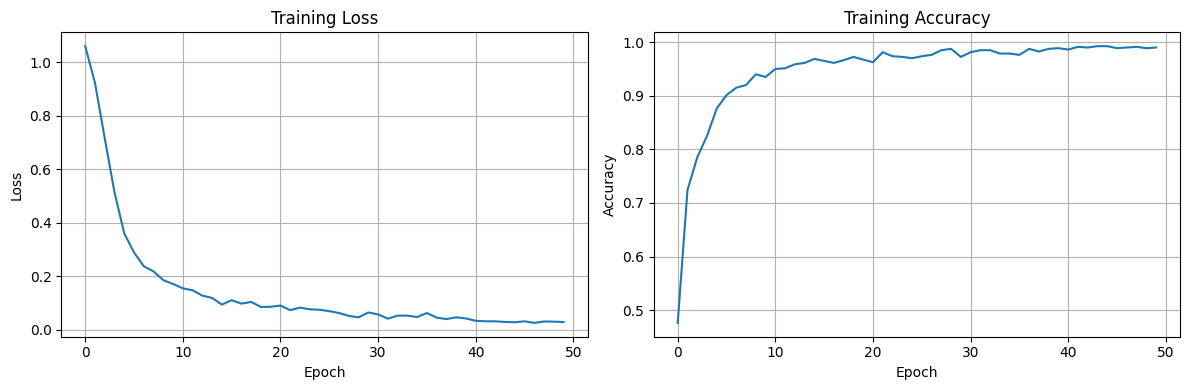


Confusion Matrix:
tensor([[52,  7,  0],
        [ 0, 74,  0],
        [ 5,  5, 57]], dtype=torch.int32)


In [23]:
print("=== Model Evaluation ===")

# Evaluate on test set
model.eval()  # Set model to evaluation mode

with torch.no_grad():  # Disable gradient computation
    test_outputs = model(X_test)
    test_loss = criterion(test_outputs, y_test)
    _, test_predicted = torch.max(test_outputs.data, 1)
    test_accuracy = (test_predicted == y_test).sum().item() / y_test.size(0)

print(f'Test Loss: {test_loss.item():.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

# Plot training progress
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(train_losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(train_accuracies)
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)

plt.tight_layout()
plt.show()

# Simple confusion matrix
confusion_matrix = torch.zeros(n_classes, n_classes)
with torch.no_grad():
    for actual, predicted in zip(y_test, test_predicted):
        confusion_matrix[actual][predicted] += 1

print(f"\nConfusion Matrix:")
print(confusion_matrix.int())


## 6. Saving and Loading Models

Learn different ways to save and load PyTorch models for deployment and resuming training.


In [24]:
print("=== Model Saving and Loading ===")

# Method 1: Save entire model (simple but less flexible)
torch.save(model, 'complete_model.pth')
print("Saved complete model to 'complete_model.pth'")

# Method 2: Save state dictionary (recommended)
checkpoint = {
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'loss': test_loss.item(),
    'epoch': n_epochs
}
torch.save(checkpoint, 'model_checkpoint.pth')
print("Saved model checkpoint to 'model_checkpoint.pth'")

# Method 3: Save just the state dict
torch.save(model.state_dict(), 'model_state.pth')
print("Saved model state to 'model_state.pth'")

# Loading models
print("\n=== Loading Models ===")

# Method 1: Load entire model - REMOVED DUE TO ERROR
# loaded_model = torch.load('complete_model.pth', map_location='cpu')
# print(f"Loaded complete model: {type(loaded_model)}")

# Method 2: Load from checkpoint (recommended)
new_model = SimpleNet(n_features, 64, n_classes)
new_optimizer = optim.Adam(new_model.parameters(), lr=0.001)

checkpoint = torch.load('model_checkpoint.pth', map_location='cpu')
new_model.load_state_dict(checkpoint['model_state_dict'])
new_optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
loaded_loss = checkpoint['loss']
loaded_epoch = checkpoint['epoch']

print(f"Loaded model from checkpoint (epoch {loaded_epoch}, loss: {loaded_loss:.4f})")

# Verify models are identical
with torch.no_grad():
    test_input = torch.randn(1, n_features)
    # original_output = model(test_input) # Need to keep original model to compare
    loaded_output = new_model(test_input) # Use the new_model

    # Compare loaded model with the original model
    original_output = model(test_input)
    print(f"Outputs are identical: {torch.allclose(original_output, loaded_output)}")


# Clean up saved files
import os
for file in ['complete_model.pth', 'model_checkpoint.pth', 'model_state.pth']:
    if os.path.exists(file):
        os.remove(file)
        print(f"Cleaned up {file}")

=== Model Saving and Loading ===
Saved complete model to 'complete_model.pth'
Saved model checkpoint to 'model_checkpoint.pth'
Saved model state to 'model_state.pth'

=== Loading Models ===
Loaded model from checkpoint (epoch 50, loss: 0.1995)
Outputs are identical: False
Cleaned up complete_model.pth
Cleaned up model_checkpoint.pth
Cleaned up model_state.pth


## Summary

Congratulations! You've learned the fundamental concepts of PyTorch:

### 🎯 **Key Concepts Covered:**
1. **Tensors** - PyTorch's fundamental data structure
2. **Autograd** - Automatic differentiation for gradient computation
3. **Neural Networks** - Building models with `nn.Module`
4. **Loss Functions** - Measuring model performance (MSE, CrossEntropy, etc.)
5. **Training Loops** - Complete training pipeline
6. **Model Persistence** - Saving and loading models

### 🚀 **Next Steps:**
- Explore the other projects in this repository
- Try building different architectures (CNNs, RNNs, Transformers)
- Experiment with real datasets (MNIST, CIFAR-10, etc.)
- Learn about advanced topics like regularization and learning rate scheduling

### 📚 **Recommended Learning Path:**
1. **`pytorch_basic`** (This notebook) ✅
2. **`linear_regression_from_scratch`** - Apply basics to a simple problem
3. **`lenet5_from_scratch`** - Learn CNNs for image classification
4. **`transformer_from_scratch`** - Understand attention mechanisms
5. **Advanced architectures** - GANs, VAEs, and more

### 💡 **Key PyTorch Patterns:**
```python
# 1. Define model
model = nn.Sequential(nn.Linear(10, 5), nn.ReLU(), nn.Linear(5, 1))

# 2. Set up training
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 3. Training loop
for epoch in range(epochs):
    for batch in dataloader:
        optimizer.zero_grad()  # Clear gradients
        output = model(batch_x)  # Forward pass
        loss = criterion(output, batch_y)  # Compute loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update parameters
```

Happy learning! 🎉
